<a href="https://colab.research.google.com/github/avalenciacu/SYS-2025-2/blob/main/Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PARCIAL UNO**

NOMBRE: Alexis Andres Valencia Cumbal  
CC: 1088588394

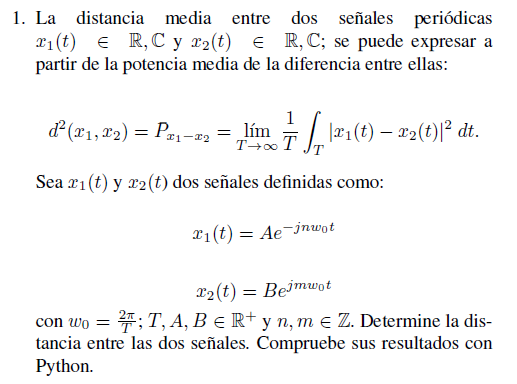

***COMPROBACION CUANDO n+m=0 Y n+m !=0***

In [ ]:
import sympy as sp

# ===== Definición de símbolos =====
t, T, A, B, n, m = sp.symbols('t T A B n m', real=True, positive=True)
w0 = 2*sp.pi/T

# ===== Señales =====
x1 = A*sp.exp(-sp.I*n*w0*t)
x2 = B*sp.exp(sp.I*m*w0*t)

# ===== Potencia media de cada señal =====
Px1 = (1/T)*sp.integrate(sp.Abs(x1)**2, (t,0,T))   # → A^2
Px2 = (1/T)*sp.integrate(sp.Abs(x2)**2, (t,0,T))   # → B^2

# ===== Término cruzado =====
C12 = (1/T)*sp.integrate(x1*sp.conjugate(x2) + sp.conjugate(x1)*x2, (t,0,T))
Px1+Px2-C12


A**2 + B**2 - (I*A*B*T/(2*pi*m*exp(2*I*pi*m)*exp(2*I*pi*n) + 2*pi*n*exp(2*I*pi*m)*exp(2*I*pi*n)) - I*A*B*T*exp(2*I*pi*m)*exp(2*I*pi*n)/(2*pi*m + 2*pi*n))/T

In [ ]:
import sympy as sp

# Símbolos
A, B, s = sp.symbols('A B s', real=True, positive=True)

# Expresión general
Pe_general = A**2 + B**2 - (A*B/(sp.pi*s))*sp.sin(2*sp.pi*s)

# Límite s -> 0
Pe_eq0 = sp.limit(Pe_general, s, 0)

Pe_eq0

A**2 - 2*A*B + B**2

**PUNTO 2**

**GRAFICA DE LA SEÑAL CONTINUA X(t)**

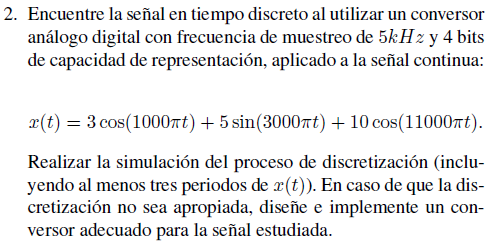

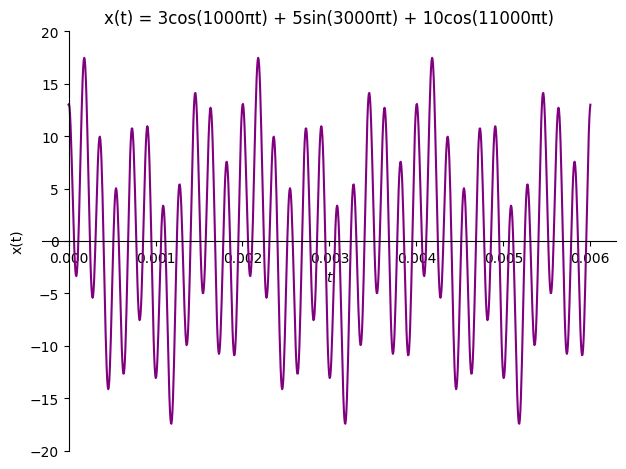

In [ ]:
# =========================
# 1) Señal continua x(t)
# x(t) = 3 cos(1000π t) + 5 sin(3000π t) + 10 cos(11000π t)
# Ventana: 3 ciclos respecto a 500 Hz  → duración = 3 * (1/500) s
# =========================

import sympy as sym

# Variable temporal simbólica
t = sym.symbols('t', real=True)

# Definición de la señal continua (sin fases)
x_t = 3*sym.cos(1000*sym.pi*t) + 5*sym.sin(3000*sym.pi*t) + 10*sym.cos(11000*sym.pi*t)

# Duración de 3 ciclos con respecto a 500 Hz
T_base = 1/500  # s
t0, t1 = 0, 3*T_base

# Gráfica
sym.plot(
    x_t, (t, t0, t1),
    ylim=[-20, 20],
    ylabel='x(t)',
    title='x(t) = 3cos(1000πt) + 5sin(3000πt) + 10cos(11000πt)',
    line_color='purple'
)


**GRAFICA DE LA SEÑAL DISCRETA X[n]**

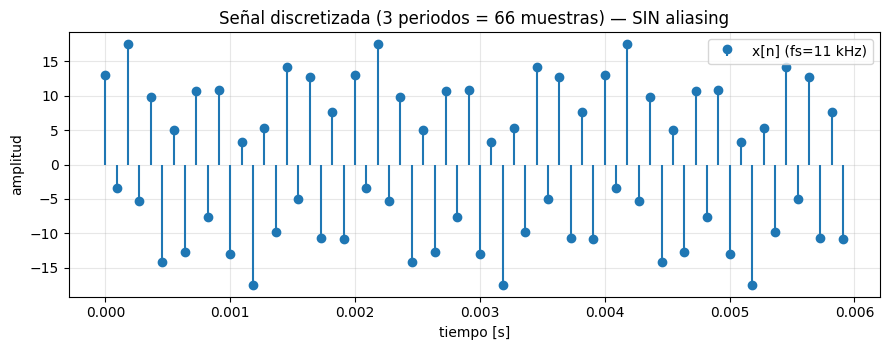

In [ ]:
# =========================================
# 2) Señal discreta x[n] (muestreo sin aliasing)
# fs = 11000 Hz → Nyquist = 5500 Hz → fmax=5500 Hz (justo al borde), sin alias
# Ω1 = 2π*500/11000 = π/11 ;  Ω2 = 2π*1500/11000 = 3π/11 ;  Ω3 = 2π*5500/11000 = π
# Periodo discreto fundamental N0 = 22 → 3 periodos = 66 muestras
# =========================================

import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 11000.0
Ts = 1/fs

# Frecuencias digitales
Omega1 = np.pi/11      # 500 Hz
Omega2 = 3*np.pi/11    # 1500 Hz
Omega3 = np.pi         # 5500 Hz

# Amplitudes
A1, A2, A3 = 3.0, 5.0, 10.0

# 3 periodos de la señal discreta
N0 = 22              # periodo fundamental en muestras
N  = 3 * N0          # 66 muestras
n  = np.arange(N)
tn = n * Ts

# Señal discreta (sin aliasing)
x_n = A1*np.cos(Omega1*n) + A2*np.sin(Omega2*n) + A3*np.cos(Omega3*n)  # cos(π n) = (-1)^n

# Gráfica
plt.figure(figsize=(9, 3.6))
plt.stem(tn, x_n, basefmt=" ", label='x[n] (fs=11 kHz)')
plt.title('Señal discretizada (3 periodos = 66 muestras) — SIN aliasing')
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**CUANTIZACION Y DIGITALIZACION DE LA SEÑAL X[n].**

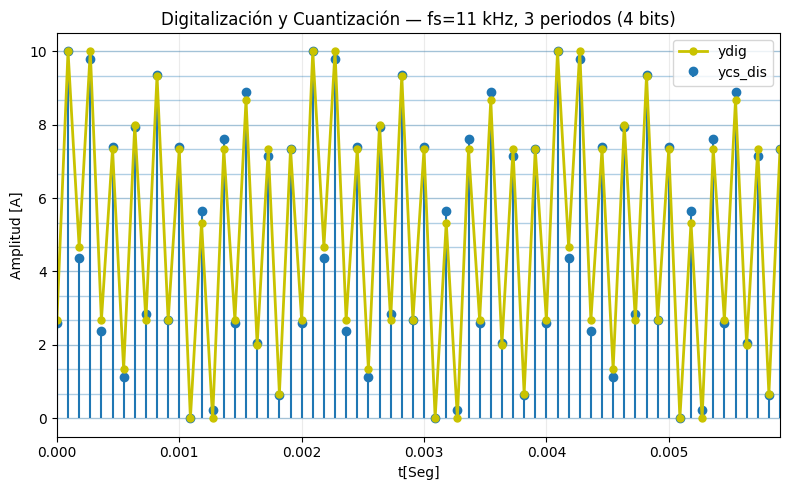

Fs=11000 Hz, Ts=0.00009091 s, muestras=66, niveles=16
Rango acondicionamiento: [0.0, 10.0]


In [ ]:
# === Digitalización y Cuantización (3 ciclos, fs=11 kHz, 4 bits) ===
# x(t) = 3cos(2π·500·t - π/4) + 5sin(2π·1500·t) + 10cos(2π·5500·t - π)
# Salida: ycs_dis (discreta acondicionada) y ydig (cuantizada), con niveles de cuantización

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# ---------------- Parámetros de muestreo ----------------
freq_muestreo = 11000.0    # Hz (≥ 2*5500 ⇒ sin aliasing)
Fs = int(round(freq_muestreo))
Ts = 1.0 / Fs

# ---------------- Señal continua (para muestrear 3 ciclos) ----------------
A1, f1 = 3.0, 500.0
A2, f2 = 5.0, 1500.0
A3, f3 = 10.0, 5500.0

# 3 ciclos respecto a 500 Hz
T_base = 1.0 / 500.0
ti, tf = 0.0, 3 * T_base

# Vector de tiempo discreto (muestras)
tv = np.arange(ti, tf, Ts)  # ~66 muestras
# Señal discretizada (MISMA forma que tu ejemplo: con fases -π/4 y -π)
xv = (A1*np.cos(2*np.pi*f1*tv - np.pi/4.0) +
      A2*np.sin(2*np.pi*f2*tv) +
      A3*np.cos(2*np.pi*f3*tv - np.pi))

# ---------------- Acondicionamiento (escalado a [rmin, rmax]) ----------------
# Como en tu ejemplo "cero y pendiente"
rmin, rmax = 0.0, 10.0      # rango de salida deseado (ajústalo si quieres)
def modificar_amplitud(x, ymin, ymax):
    xmin = float(np.min(x))
    xmax = float(np.max(x))
    m = (ymax - ymin) / (xmax - xmin) if xmax != xmin else 1.0
    c = ymax - m * xmax
    return m * x + c

yv = modificar_amplitud(xv, rmin, rmax)  # ycs_dis (continua->discreta acondicionada)

# ---------------- Cuantización (4 bits) ----------------
num_bits = 4
L = 2**num_bits
# Vector de niveles (incluye extremos) → paso = (rmax - rmin) / (L - 1)
ve = np.linspace(rmin, rmax, L)

# Cuantizador por vecindad (nearest level) usando distancia euclídea
# Vectorizamos el cálculo: para cada muestra escoger el índice de nivel más cercano
# (usamos cdist para mantener tu enfoque original)
dist = cdist(yv.reshape(-1, 1), ve.reshape(-1, 1))  # (N, L)
ind_min = np.argmin(dist, axis=1)                   # (N,)
yq = ve[ind_min]                                    # ydig

# ---------------- Gráfica estilo "gráfica 3" ----------------
plt.figure(figsize=(8, 5))

# Niveles horizontales (0..10 en este ejemplo)
for v in ve:
    plt.hlines(v, tv[0], tv[-1], linewidth=1.0, alpha=0.35)

# Señal discreta acondicionada (ycs_dis) tipo stem, azul
plt.stem(tv, yv, basefmt=" ", linefmt='C0-', markerfmt='C0o',
         label='ycs_dis') # Removed use_line_collection=True

# Señal digital (cuantizada) ydig, amarilla con marcadores
plt.plot(tv, yq, '-o', color='#c9c300', linewidth=2.0, markersize=5, label='ydig')

plt.title('Digitalización y Cuantización — fs=11 kHz, 3 periodos (4 bits)')
plt.xlabel('t[Seg]')
plt.ylabel('Amplitud [A]')
plt.xlim(tv[0], tv[-1])
plt.ylim(rmin - 0.5, rmax + 0.5)
plt.grid(True, alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()

# ---------------- (opcional) imprimir algunos datos ----------------
print(f"Fs={Fs} Hz, Ts={Ts:.8f} s, muestras={tv.size}, niveles={L}")
print(f"Rango acondicionamiento: [{rmin}, {rmax}]")

**PUNTO 4**
Encuentre el espectro de Fourier, su parte real,
imaginaria, magnitud, fase y el error relativo para
n∈{0,±1,±2,±3,±4,±5}, a partir de x
(t) para la
señal x(t) en la Figura 1 . Compruebe el espectro obtenido
con la estimacion a partir de x(t). Presente las simulaciones
de Python respectivas.

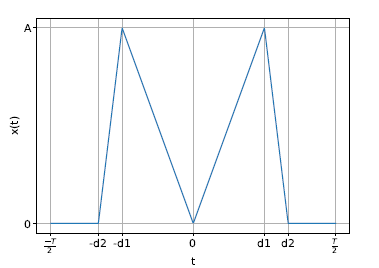

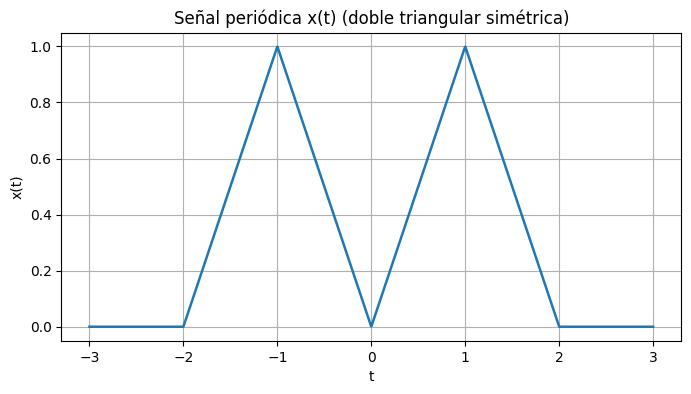

/tmp/ipython-input-3618219432.py:57: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return (1 / T) * np.trapz(integrando, t)
/tmp/ipython-input-3618219432.py:62: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return (1 / T) * np.trapz(x, t)



Coeficientes complejos Cn (n=-5..5):
 n	Re(Cn)		Im(Cn)		|Cn|		fase(rad)
-5	+1.21585e-02	+0.00000e+00	1.21585e-02	0.000
-4	-2.32009e-17	+0.00000e+00	2.32009e-17	3.142
-3	-6.75475e-02	+0.00000e+00	6.75475e-02	3.142
-2	+5.06201e-17	+0.00000e+00	5.06201e-17	0.000
-1	+3.03964e-01	+0.00000e+00	3.03964e-01	0.000
 0	+3.33333e-01	+0.00000e+00	3.33333e-01	0.000
 1	+3.03964e-01	+0.00000e+00	3.03964e-01	0.000
 2	+5.06201e-17	+0.00000e+00	5.06201e-17	0.000
 3	-6.75475e-02	+0.00000e+00	6.75475e-02	3.142
 4	-2.32009e-17	+0.00000e+00	2.32009e-17	3.142
 5	+1.21585e-02	+0.00000e+00	1.21585e-02	0.000


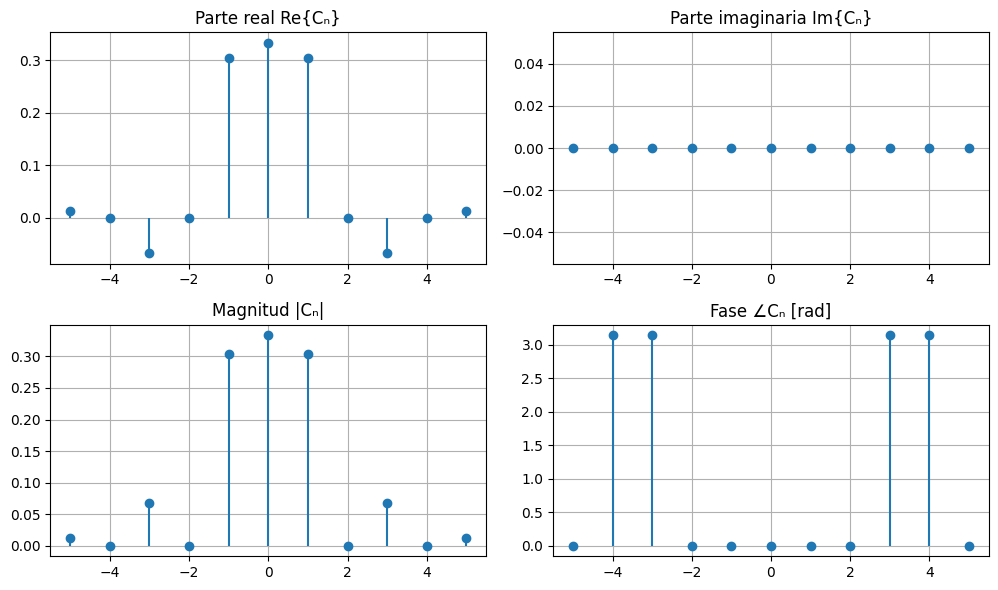

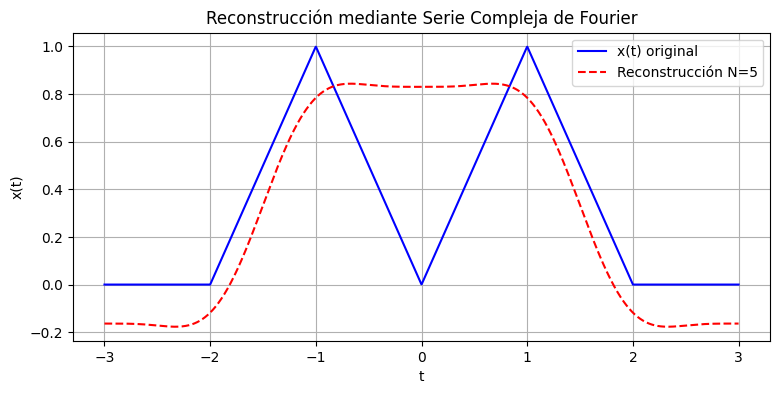

In [ ]:
"""
Reconstrucción y análisis espectral de una señal doble triangular periódica (simétrica)
"""

import numpy as np
import matplotlib.pyplot as plt

# === Parámetros ===
A = 1.0    # Amplitud máxima
T = 6.0    # Periodo
d1 = 1.0   # Pico (±d1)
d2 = 2.0   # Punto donde x(t) vuelve a cero (±d2)

# === Dominio temporal ===
t = np.linspace(-T/2, T/2, 2000)
omega0 = 2 * np.pi / T

# === Definición de x(t) según la figura ===
def x_t(t):
    t = np.array(t)
    x = np.zeros_like(t)

    # -d2 ≤ t < -d1 : rampa ascendente
    mask1 = (-d2 <= t) & (t < -d1)
    x[mask1] = A * (t[mask1] + d2) / (d2 - d1)

    # -d1 ≤ t < 0 : rampa descendente hacia 0
    mask2 = (-d1 <= t) & (t < 0)
    x[mask2] = A * (-t[mask2]) / d1

    # 0 ≤ t < d1 : rampa ascendente desde 0 a A
    mask3 = (0 <= t) & (t < d1)
    x[mask3] = A * (t[mask3]) / d1

    # d1 ≤ t < d2 : rampa descendente hasta 0
    mask4 = (d1 <= t) & (t < d2)
    x[mask4] = A * (d2 - t[mask4]) / (d2 - d1)

    # fuera de ±d2: x=0
    return x

x = x_t(t)

# === Graficar la señal ===
plt.figure(figsize=(8, 4))
plt.plot(t, x, linewidth=1.8)
plt.title("Señal periódica x(t) (doble triangular simétrica)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.show()

# === Cálculo de coeficientes de Fourier ===
def Cn_direct(n):
    """Coeficientes complejos de Fourier: integral directa"""
    integrando = x * np.exp(-1j * n * omega0 * t)
    return (1 / T) * np.trapz(integrando, t)

def Cn_from_second_derivative(n):
    """Coeficiente Cn obtenido desde x''(t)"""
    if n == 0:
        return (1 / T) * np.trapz(x, t)
    num = 2 * A * (np.cos(n * omega0 * d1) - np.cos(n * omega0 * d2))
    den = T * (n * omega0)**2
    return num / den  # Real, porque la señal es par

# === Calcular coeficientes para n = -5 ... 5 ===
Nmax = 5
n_values = np.arange(-Nmax, Nmax + 1)

C_direct = np.array([Cn_direct(n) for n in n_values])
C_deriv = np.array([Cn_from_second_derivative(n) for n in n_values])

# === Mostrar tabla ===
print("\nCoeficientes complejos Cn (n=-5..5):")
print(" n\tRe(Cn)\t\tIm(Cn)\t\t|Cn|\t\tfase(rad)")
for i, n in enumerate(n_values):
    mag = np.abs(C_deriv[i])
    pha = np.angle(C_deriv[i])
    print(f"{n:2d}\t{C_deriv[i].real:+.5e}\t{C_deriv[i].imag:+.5e}\t{mag:.5e}\t{pha:.3f}")

# === Graficar espectro ===
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Parte real
axs[0, 0].stem(n_values, np.real(C_deriv), basefmt=" ")
axs[0, 0].set_title("Parte real Re{Cₙ}")
axs[0, 0].grid(True)

# Parte imaginaria
axs[0, 1].stem(n_values, np.imag(C_deriv), basefmt=" ")
axs[0, 1].set_title("Parte imaginaria Im{Cₙ}")
axs[0, 1].grid(True)

# Magnitud
axs[1, 0].stem(n_values, np.abs(C_deriv), basefmt=" ")
axs[1, 0].set_title("Magnitud |Cₙ|")
axs[1, 0].grid(True)

# Fase
axs[1, 1].stem(n_values, np.angle(C_deriv), basefmt=" ")
axs[1, 1].set_title("Fase ∠Cₙ [rad]")
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

# === Reconstrucción de la señal ===
def reconstruccion(ti, N):
    suma = np.zeros_like(ti, dtype=complex)
    for n in range(-N, N + 1):
        suma += Cn_from_second_derivative(n) * np.exp(1j * n * omega0 * ti)
    return suma

x_rec = reconstruccion(t, 5)

plt.figure(figsize=(9, 4))
plt.plot(t, x, label="x(t) original", color='blue')
plt.plot(t, np.real(x_rec), '--r', label="Reconstrucción N=5")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Reconstrucción mediante Serie Compleja de Fourier")
plt.legend()
plt.grid(True)
plt.show()
